## Estimating pi with a random number generator

Recently, a friend asked me if I knew about Monte Carlo and told me that the number PI can be estimated with random numbers.

I then decided to see if I could do that without looking up the solution.

Here it goes...

### Import stuff

In [1]:
%pip install "matplotlib<4" "numpy<2"

import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
rng = np.random.default_rng(seed=0)


Note: you may need to restart the kernel to use updated packages.


### Generate random points (x, y pairs) uniformly distributed in the unit square

In [2]:
number_of_pairs = 1_000

# Generate both axes
xy = rng.uniform(0, 1, number_of_pairs * 2)

# Split into x and y
x, y = np.array_split(xy, 2)


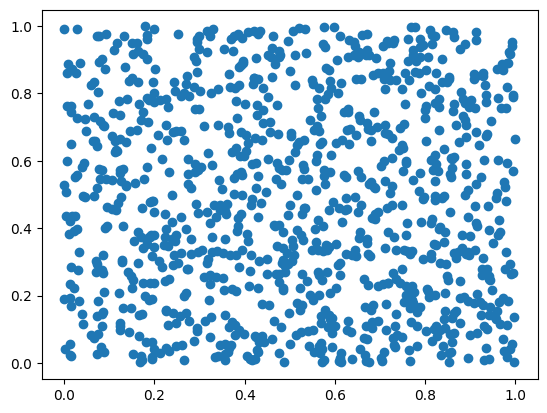

In [3]:
def show_scatter(x, y):
    plt.scatter(x, y)
    plt.show()

show_scatter(x, y)


## Remove points outside of the unit circle

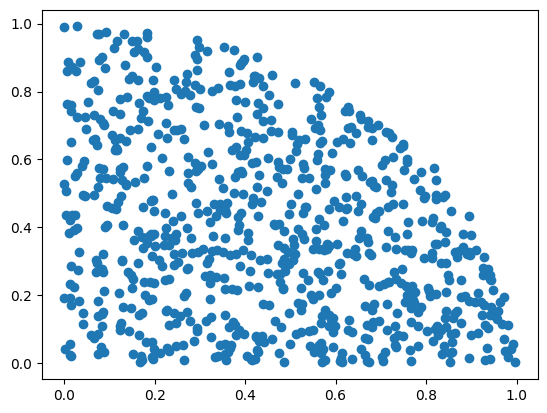

In [4]:
mask = x**2 + y**2 <= 1
x = x[mask]
y = y[mask]

show_scatter(x, y)


## Map all points on the circle border

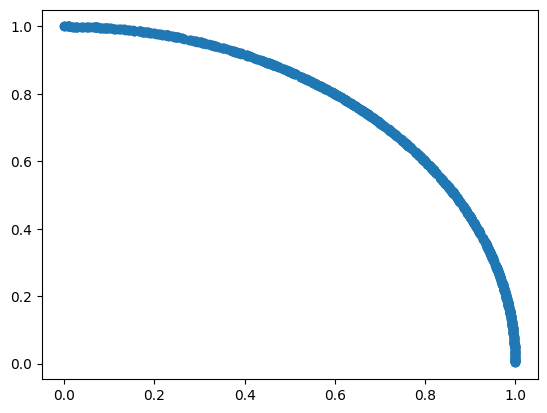

In [5]:
distances_from_origin = np.sqrt(x**2 + y**2)

x = np.divide(x, distances_from_origin)
y = np.divide(y, distances_from_origin)

show_scatter(x, y)


## Observe the distribution of x

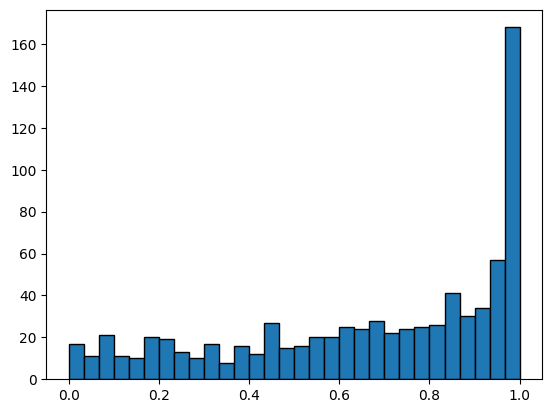

In [6]:
def show_histogram(x, bins: int = 30):
    plt.hist(x, bins=bins, edgecolor='black')
    plt.show()

show_histogram(x)


As we get from x=0 to x=1, the circle border gets more perpendicular to the x axis, and the x values of the random numbers are more condensed.

## Get all the distances between x values

In [7]:
def get_counterpart(x_or_y):
    """
    Given an x value between 0 and 1,
    find the y value that maps that x value on the unit circle.
    Works x->y and y->x
    """
    return np.sqrt(np.ones(x_or_y.shape) - x_or_y**2)

def get_euclidian_distances(x1, x2):
    """
    Given two x matrices,
    find the euclidian distance between their corresponding points on the unit circle.
    It is an element-wise operation.
    """
    y1 = get_counterpart(x1)
    y2 = get_counterpart(x2)
    return np.sqrt((x1 - x2)**2 + (y1 -y2)**2)

x.sort()

# Obtain each distance between neighboring points on the unit circle
distances = get_euclidian_distances(x[:-1], x[1:])


## Estime pi by summing the distances (obtaining the length of the quarter circle)

In [8]:
quarter_circle_circumference = np.sum(distances)

# pi is half a complete circle
pi = quarter_circle_circumference * 2

print(pi)


3.13437477474681


## Grid search various numbers of points on the circle to observe convergence

In [9]:
import math

def estimate_pi(points_on_circle: int) -> float:
    """
    Given an amount of number of random points, estimate pi.
    """

    # Generate points
    xy = rng.uniform(0, 1, points_on_circle * 2)
    x, y = np.array_split(xy, 2)

    # Remove points outside of circle
    mask = x**2 + y**2 <= 1
    x = x[mask]
    y = y[mask]

    # Carry x values to the circle border
    distances_from_origin = np.sqrt(x**2 + y**2)
    x = np.divide(x, distances_from_origin)

    # Sum over the distances between points on circle
    x.sort()
    distances = get_euclidian_distances(x[:-1], x[1:])
    return np.sum(distances) * 2


def get_error(pi_estimation: float) -> float:
    """
    Get the relative error of the pi estimation.
    """
    return abs(pi_estimation - math.pi) / math.pi


numbers_of_points_on_circle = [10_000, 100_000, 1_000_000, 10_000_000, 100_000_000]
errors = []

for number_of_points_on_circle in numbers_of_points_on_circle:
    pi = estimate_pi(number_of_points_on_circle)
    error = get_error(pi)
    errors.append(error)
    print(f"{number_of_points_on_circle=:>15}, {error=:.10f}")
    

number_of_points_on_circle=          10000, error=0.0001428620
number_of_points_on_circle=         100000, error=0.0000150313
number_of_points_on_circle=        1000000, error=0.0000038575
number_of_points_on_circle=       10000000, error=0.0000001292
number_of_points_on_circle=      100000000, error=0.0000000124


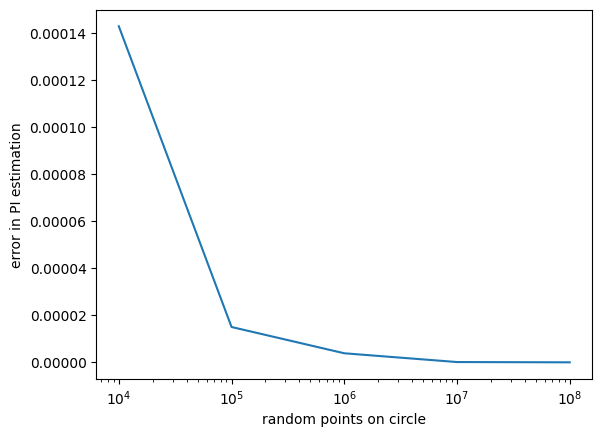

In [10]:
plt.plot(numbers_of_points_on_circle, errors)
plt.xscale("log")
plt.xlabel('random points on circle')
plt.ylabel('error in PI estimation')
plt.show()
